# NLP (Natural Language Processing)  Spam/Ham SMS detection

For this project we will be exploring Ham vs Spam SMS.  Using natural language processing we will predict whether a sms is spam or ham.

## Check out the data
### Import Libraries

In [1]:
import  nltk

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection') ]

In [ ]:
messages

In [ ]:
for message_no,message in enumerate(messages):
    print(message_no,message)
    print('\n')

### Creating Data Frame 

In [6]:
df_messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['labels','message'])

In [7]:
df_messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df_messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df_messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [11]:
df_messages['message'].apply(len).max()

910

In [12]:
df_messages['length_of_message']=df_messages['message'].apply(len)

In [13]:
df_messages.head()

,labels,message,length_of_message
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Longest message

In [14]:
df_messages[df_messages['length_of_message']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### *There is no missing values*

### Look for missing value in Features dataset

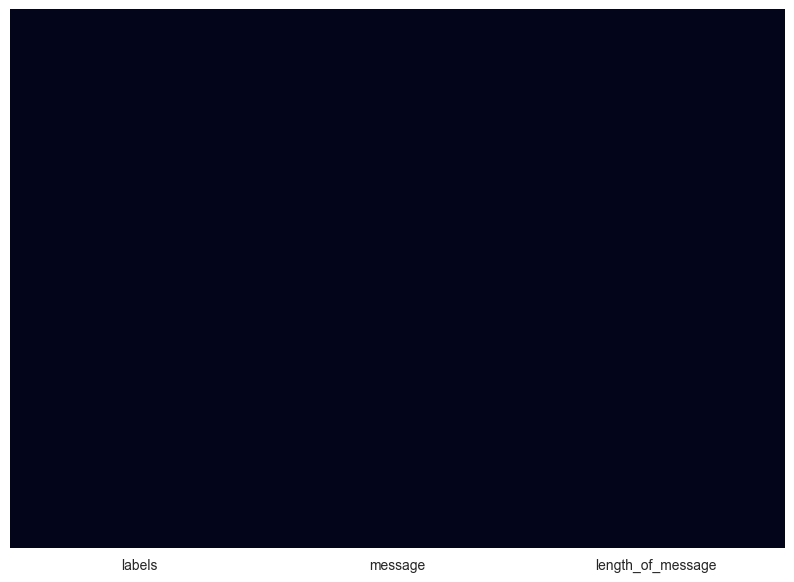

In [105]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.heatmap(df_messages.isnull(),yticklabels=False,cbar=False)
plt.show()

### Exploratory Data Analysis

<Axes: xlabel='labels', ylabel='count'>

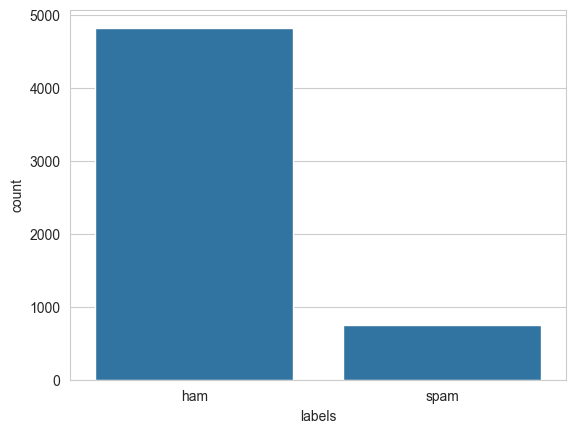

In [15]:
sns.set_style('whitegrid')
sns.countplot(data=df_messages,x='labels')

In [16]:
df_messages['labels'].value_counts()

labels
ham     4825
spam     747
Name: count, dtype: int64

<Figure size 1000x700 with 0 Axes>

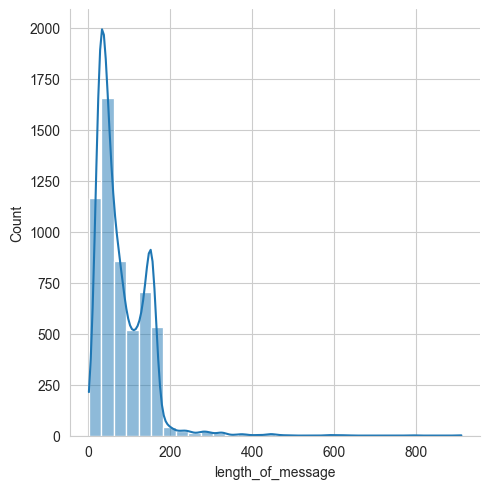

In [31]:
plt.figure(figsize=(10,7))
sns.displot(df_messages['length_of_message'],bins=30,kde=True)
plt.show()

<Figure size 1000x700 with 0 Axes>

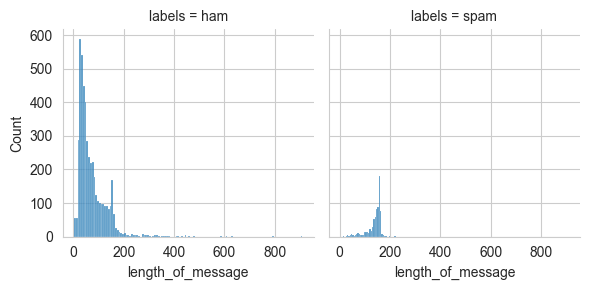

In [33]:
plt.figure(figsize=(10,7))
grp=sns.FacetGrid(df_messages,col='labels')
grp.map(sns.histplot,'length_of_message')
plt.show()

### Splitting Training and Testing Data

In [104]:
X=df_messages['message']
y=df_messages['labels']
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test=train_test_split(X,y,test_size=0.3,random_state=101)

### Training Natural Language Processing

In [34]:
import string
from nltk.corpus import  stopwords

In [35]:
def process (msg):
    nonpunc=[punc for punc in msg if punc not in string.punctuation]
    nonpunc=''.join(nonpunc)
    return [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

In [87]:
from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [97]:
from sklearn.pipeline import Pipeline

In [98]:
pipeline=Pipeline([('bow',CountVectorizer(analyzer=process)),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())])

In [99]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function process at 0x000001D99B2C00E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [100]:
predict=pipeline.predict(msg_test)

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

### Evaluation of Natural Language Processing

In [102]:
print('Confusion Matrix:')
print(confusion_matrix(label_test,predict))
print('\n')
print('Classification_report:')
print(classification_report(label_test,predict))


Confusion Matrix:
[[1460   15]
 [  28  169]]


Classification_report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1475
        spam       0.92      0.86      0.89       197

    accuracy                           0.97      1672
   macro avg       0.95      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672

